# TSP Djibouti - 38 cities

# Importing libraries

In [3]:
from deap import algorithms, base, creator, tools
import pandas as pd
import re
import random
import time
import matplotlib.pyplot as plt
import numpy as np
import math

## Define a function for reading the data and calculate distance matrix

In [5]:
def read_tsplib_file(filename):
    with open(filename) as file:
        lines = file.readlines()
        data = [j.lstrip() for j in lines if j != ""]

        for item in data:
            if item.startswith('DIMENSION'):
                dimension = int(item[11:16].replace(" ",""))
                break
        print(dimension)
        c = [1.0] * (2 * dimension)

        cities_coord = []
        for item in data:
            if item[0].isdigit():
                j, coordX, coordY = [float(x.strip()) for x in item.split(' ')]
                cities_coord.append([coordX, coordY])
                c[2 * (int(j) - 1)] = coordX
                c[2 * (int(j) - 1) + 1] = coordY


        cities = pd.DataFrame(cities_coord)
        dist_mat = [[1] * dimension for l in range(dimension)]

        for k in range(dimension):
            dist_mat[k][k] = 0
            for j in range(k + 1, dimension):
                dist = math.sqrt((c[k * 2] - c[j * 2]) ** 2 + (c[k * 2 + 1] - c[j * 2 + 1]) ** 2)
                dist = round(dist)
                dist_mat[k][j] = dist
                dist_mat[j][k] = dist
    return dist_mat, dimension, cities

In [6]:
def evalTSP(individual2):
    distance = dist_matrix[individual2[-1]][individual2[0]]
    for gene1, gene2 in zip(individual2[0:-1], individual2[1:]):
        distance = distance + dist_matrix[gene1][gene2]
    return distance,

## Create a toolbox - genetic algoritm

create individual class. Individual is identified by a list of floats, every float indicates the id of a node (a gene).

Then the following steps are performed in the order: mate, mutate, select

In [7]:
def create_toolbox(num_cities, ind_mutpb, tourn_size):
    tbox = base.Toolbox()

    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", np.ndarray, fitness=creator.FitnessMin)

    tbox.register("indices", np.random.permutation, num_cities)
    tbox.register("individual", tools.initIterate, creator.Individual, tbox.indices)
    tbox.register("population", tools.initRepeat, list, tbox.individual)

    tbox.register("mate", tools.cxOrdered)
    tbox.register("mutate", tools.mutShuffleIndexes, indpb=ind_mutpb)
    tbox.register("select", tools.selTournament, tournsize=tourn_size)
    tbox.register("evaluate", evalTSP)
    return tbox


def create_stats():
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register('min', np.min)
    return stats

## Definition of a function to print the solution

In [8]:
def print_solution(res, log, duration):
    solution_x = tools.selBest(res, k=1)[0]
    fitness = evalTSP(solution_x)[0]
    n_evals = sum([x['nevals'] for x in log])
    nb_gen = len(log) - 1
    print('-' * 100)
    print("Function name: %s" % problem_name)
    print("Problem dimension: %d" % nb_cities)
    print("Global Optimum: %d" % optimal_fitness)
    print('-' * 100)
    print("Algorithm: %s" % algorithm_name)
    print("Parameters:")
    for p in params:
        print("\t%s: " % p, params[p])
    print('-' * 100)
    print("Fitness: %d" % fitness)
    print("Solution: ")
    print(solution_x)
    print('-' * 100)
    print("Nb of functions evaluations: %d" % n_evals)
    print("Stopping criterion: after %d generations" % nb_gen)
    print("computational time: %.3f seconds" % duration)

    plt.plot(log.select('min'), 'c-')
    plt.ylabel('Fitness');
    plt.xlabel('Generations');
    plt.show()

## Define algorithm parameters

38
------------------------------------------------------------
Function: Djibouti 38 TSP
Problem dimension: 38
Global Optimum: 6656
------------------------------------------------------------
Algorithm: Simple Evolutionary Algorithm
Parameters:
	Population Size:  50
	Nb of generations:  5
	Crossover probability:  0.8
	Mutation Probability:  0.1
	Indep. gene mut prob:  0.02
	Tournament size:  3
------------------------------------------------------------
Fitness: 20861
Solution: 
[12 34 15  9 20 13 17  2 11 18  7  0  5  6 10 16  4 14 31 24 27 21 37 36
 35 26  3  1 28 29 25  8 22 32 19 30 33 23]
------------------------------------------------------------
Nb of functions evaluations: 263
Stopping criterion: after 5 generations
computational time: 0.134 seconds


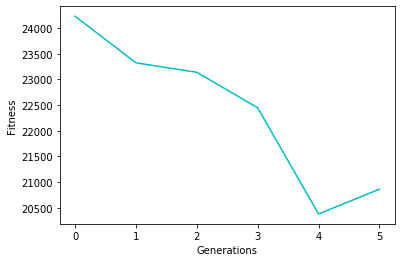

In [11]:
algorithm_name = "Simple Evolutionary Algorithm"

pop_size = 50
nb_generations = 5
cross_prob = 0.8
mut_prob = 0.1
indep_mut_prob = 0.02
tournament_size = 3

params = {"Population Size": pop_size,
          "Nb of generations": nb_generations,
          "Crossover probability": cross_prob,
          "Mutation Probability": mut_prob,
          "Indep. gene mut prob": indep_mut_prob,
          "Tournament size": tournament_size
          }

# instantiate problem to solve
problem_name = 'Djibouti 38 TSP'
optimal_fitness = 6656

filename = '../data/dj38.tsp'
dist_matrix, nb_cities, cities_coord = read_tsplib_file(filename)

toolbox = create_toolbox(nb_cities, indep_mut_prob, tournament_size)
fit_stats = create_stats()

# run algorithm and print solution
random.seed(34)
t1 = time.time()


result, log = algorithms.eaSimple(toolbox.population(n=pop_size),
                                  toolbox,
                                  cxpb=cross_prob,
                                  mutpb=mut_prob,
                                  ngen=nb_generations,
                                  verbose=False,
                                  stats=fit_stats)

t2 = time.time()
print_solution(res=result, log=log, duration=t2-t1)

## Representation of the travel selected 

In [16]:
list = result[len(result)-1]
%matplotlib
plt.scatter(cities_coord.iloc[:, 0], cities_coord.iloc[:, 1], marker='o',color ='red', facecolors='none', s=80)
j=0
xlist=[]
ylist=[]
num_list=[]
for i in range(len(list)):
    j=+1
    xlist.append(cities_coord.iloc[i,0])
    ylist.append(cities_coord.iloc[i, 1])
    plt.text(xlist[i], ylist[i], "Point_" + str(i + 1))
    num_list.append(j)
    plt.xlim(min(cities_coord.iloc[:,0]),max(cities_coord.iloc[:,0]))
    plt.xlabel('X-position')
    plt.ylim(min(cities_coord.iloc[:, 1]), max(cities_coord.iloc[:, 1]))
    plt.ylabel('Y-position')
    plt.plot(xlist, ylist,color = 'blue')
    plt.pause(0.1)
    # plt.text(xlist[i] + 20, ylist[i] + 20, str(j), fontsize=12)
    plt.show()
plt.savefig("./Results/Traject_djb38" + ".png")
#plt.close()

Using matplotlib backend: Qt5Agg


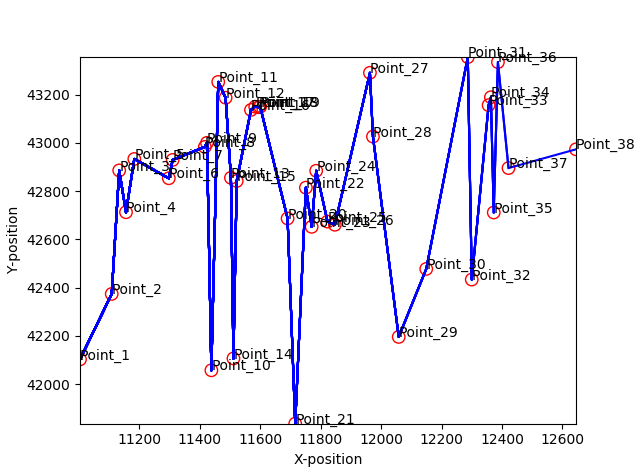

In [18]:
from PIL import Image
img = Image.open('./Results/Traject_djb38.png')
img